### Transformations

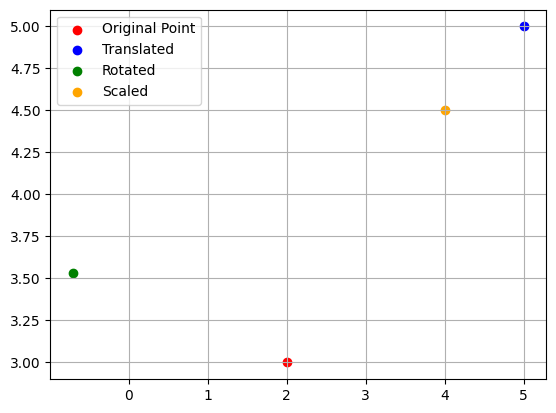

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 2D point and plot
point = np.array([2, 3])
plt.scatter(point[0], point[1], label="Original Point", color='red')

# Translation Matrix
def translation_matrix(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

# Rotation Matrix (angle in radians)
def rotation_matrix(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0, 0, 1]
    ])

# Scaling Matrix
def scaling_matrix(sx, sy):
    return np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0,  0, 1]
    ])

# Convert point to homogeneous coordinates
homogeneous_point = np.array([point[0], point[1], 1])

# Apply transformations
translated_point = np.dot(translation_matrix(3, 2), homogeneous_point)  # Translate by (3, 2)
rotated_point = np.dot(rotation_matrix(np.pi / 4), homogeneous_point)   # Rotate by 45 degrees
scaled_point = np.dot(scaling_matrix(2, 1.5), homogeneous_point)        # Scale by (2, 1.5)

# Plot results
plt.scatter(translated_point[0], translated_point[1], label="Translated", color='blue')
plt.scatter(rotated_point[0], rotated_point[1], label="Rotated", color='green')
plt.scatter(scaled_point[0], scaled_point[1], label="Scaled", color='orange')
plt.legend()
plt.grid()
plt.show()


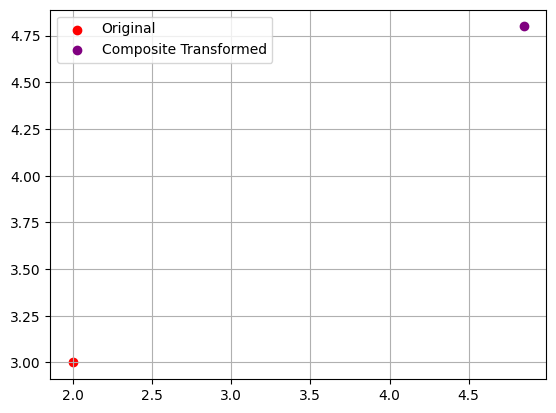

In [19]:
# Combine translation, rotation, and scaling
composite_transformation = np.dot(
    translation_matrix(3, 2), 
    np.dot(rotation_matrix(np.pi / 6), scaling_matrix(1.5, 0.5))
)

# Apply the composite transformation
composite_point = np.dot(composite_transformation, homogeneous_point)

# Visualize
plt.scatter(point[0], point[1], label="Original", color='red')
plt.scatter(composite_point[0], composite_point[1], label="Composite Transformed", color='purple')
plt.legend()
plt.grid()
plt.show()


### Transformation on image

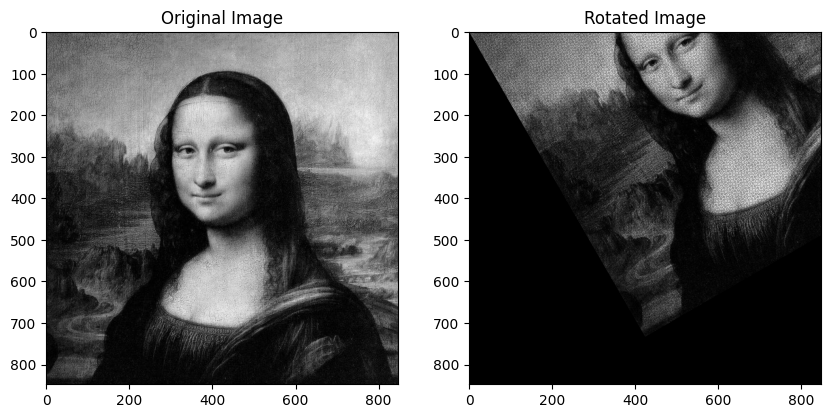

In [46]:
import cv2

# Load an image
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Define rotation matrix for the center of the image
h, w = img.shape
theta = np.pi / 6  # Rotate 30 degrees
rotation_mat = np.array([
    [np.cos(theta), -np.sin(theta), (1 - np.cos(theta)) * (w / 2) + np.sin(theta) * (h / 2)],
    [np.sin(theta),  np.cos(theta), (1 - np.cos(theta)) * (h / 2) - np.sin(theta) * (w / 2)],
    [0, 0, 1]
])

# Create homogeneous coordinates for image pixels
rows, cols = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
homogeneous_coords = np.stack([rows.ravel(), cols.ravel(), np.ones(rows.size)], axis=0)

# Apply the rotation
rotated_coords = np.dot(rotation_mat, homogeneous_coords)
rotated_coords = rotated_coords[:2].astype(int)

# Create a blank image and map the rotated coordinates back
rotated_img = np.zeros_like(img)
valid_indices = (
    (rotated_coords[0] >= 0) & (rotated_coords[0] < img.shape[1]) &
    (rotated_coords[1] >= 0) & (rotated_coords[1] < img.shape[0])
)
rotated_img[rotated_coords[1, valid_indices], rotated_coords[0, valid_indices]] = img[rows.ravel()[valid_indices], cols.ravel()[valid_indices]]

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Rotated Image")
plt.imshow(rotated_img, cmap='gray')
plt.show()


### Singular Value Decomposition

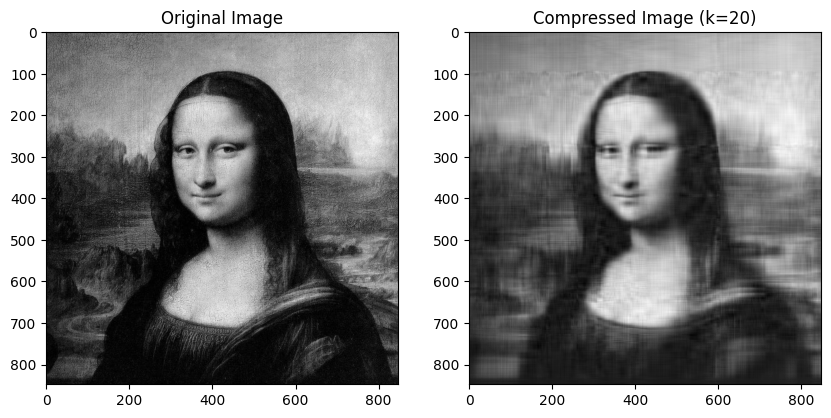

True

In [50]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load grayscale image
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Perform SVD
U, S, Vt = np.linalg.svd(img, full_matrices=False)

# Reconstruct image using top-k singular values
k = 20
compressed_img = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))

# Display original and compressed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")

plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.title(f"Compressed Image (k={k})")
plt.imshow(compressed_img, cmap='gray')
plt.show()
cv2.imwrite('low_res_image.jpg',compressed_img)

### Super Resolution

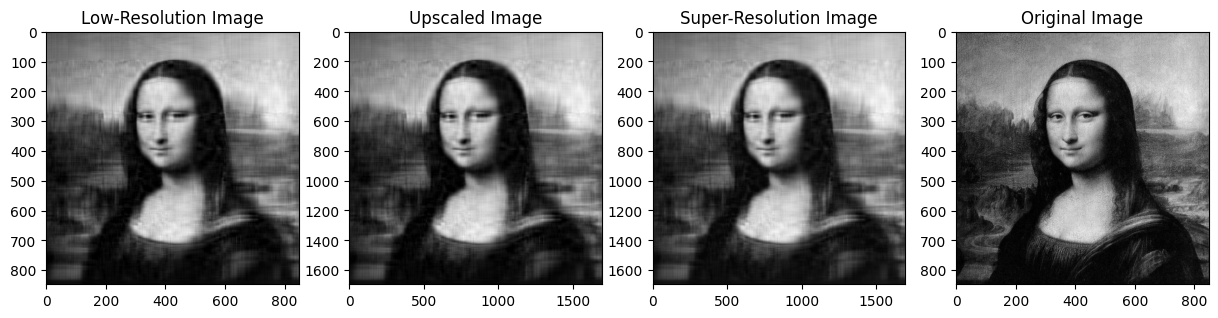

In [51]:
# Load a low-resolution grayscale image
low_res_img = cv2.imread('low_res_image.jpg', cv2.IMREAD_GRAYSCALE)

# Upscale the image
scale_factor = 2
upscaled_img = cv2.resize(low_res_img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

# Perform SVD on the upscaled image
U, S, Vt = np.linalg.svd(upscaled_img, full_matrices=False)

# Keep more singular values to refine details
k = 50
super_res_img = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))

# Display results
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.title("Low-Resolution Image")
plt.imshow(low_res_img, cmap='gray')
plt.subplot(1, 4, 2)
plt.title("Upscaled Image")
plt.imshow(upscaled_img, cmap='gray')
plt.subplot(1, 4, 3)
plt.title("Super-Resolution Image")
plt.imshow(super_res_img, cmap='gray')
plt.subplot(1, 4, 4)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.show()


In [52]:
upscaled_img_or = cv2.resize(img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

Mean Squared Quantization Error (MSQE): 12.382594108581543


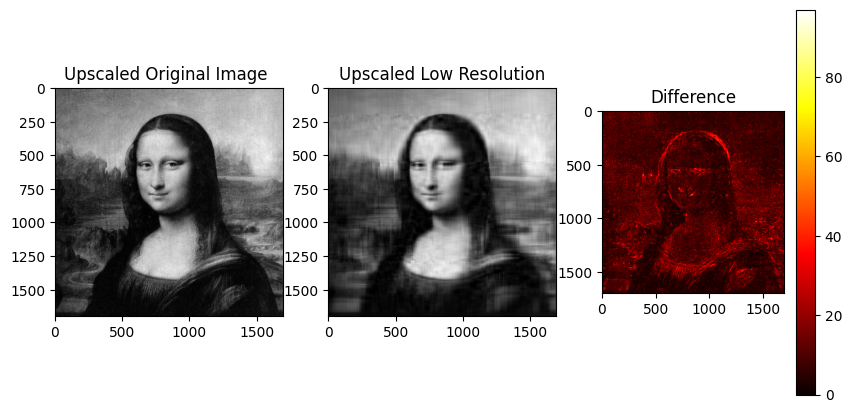

In [53]:
import numpy as np
import matplotlib.pyplot as plt




# Convert images to float32 for numerical stability
img1 = upscaled_img_or.astype(np.float32)
img2 = upscaled_img.astype(np.float32)

# Calculate Mean Squared Quantization Error (MSQE)
msqe = np.sqrt(np.mean((img1 - img2) ** 2))

print(f"Mean Squared Quantization Error (MSQE): {msqe}")

# Visualization (optional)
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Upscaled Original Image ")
plt.imshow(img1, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Upscaled Low Resolution")
plt.imshow(img2, cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Difference")
plt.imshow(np.abs(img1 - img2), cmap='hot')
plt.colorbar()
plt.show()


Mean Squared Quantization Error (MSQE): 12.37462043762207


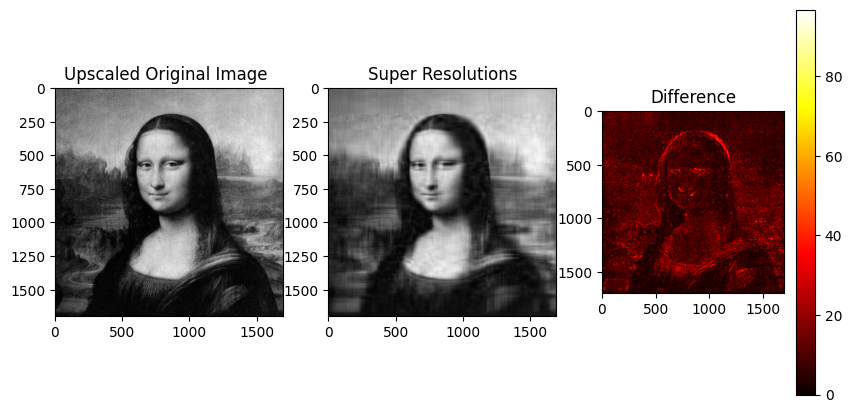

In [54]:
import numpy as np
import matplotlib.pyplot as plt




# Convert images to float32 for numerical stability
img1 = upscaled_img_or.astype(np.float32)
img2 = super_res_img.astype(np.float32)

# Calculate Mean Squared Quantization Error (MSQE)
msqe = np.sqrt(np.mean((img1 - img2) ** 2))

print(f"Mean Squared Quantization Error (MSQE): {msqe}")

# Visualization (optional)
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Upscaled Original Image ")
plt.imshow(img1, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Super Resolutions")
plt.imshow(img2, cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Difference")
plt.imshow(np.abs(img1 - img2), cmap='hot')
plt.colorbar()
plt.show()
